In [1]:
%matplotlib inline

# About

The aim is implement SGD on a surrogate error function, which has to be minimized. The error function might or might not be convex. We compute the gradient manually or automaticall, via [autograd](https://github.com/HIPS/autograd). 

Date: 2019-10-15, room PII2

# Gradiend descent for a simple univariate function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Function definition, plot, finding minimum over a discrete set of points

In [3]:
# Surrogate error function. 

def f(x):
    """Defines a function whose minimum has to be found."""
    return x**2 + 10

In [4]:
# select the points fro drawing f

x_draw = np.linspace(-10, 10, 1000)
y_draw = f(x_draw)

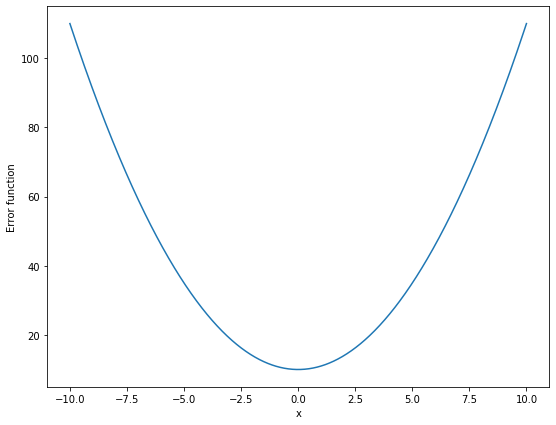

In [5]:
figsize = (9, 7)

plt.figure(figsize=figsize)
plt.plot(x_draw, y_draw)
plt.xlabel('x')
plt.ylabel('Error function')
plt.show()

In [6]:
# find the minimum value of f computed on the discrete set x_draw

min_f_discrete = np.min(f(x_draw))
print(f'The min value found by discretization: {min_f_discrete}')
print(f'Number of evaluations of f: {len(x_draw)}')

The min value found by discretization: 10.0001002003004
Number of evaluations of f: 1000


## Stochastic gradient descent

SGD algorithm:
* randomly choose a starting point $x$, in the domain of error function $f$
* update the current position as:
$$
x \leftarrow x - \alpha \cdot f'(x)
$$
* repeat until $f'(x) = 0$ or a predefined maximum number of iterations is reached

Expected outcome: a decreasing sequence of numbers $f(x)$.

In [7]:
# start from a randomly chosen point 
x_current = 7 # 7 is a perfect random number
# or choose it pseudo-randomly 
# x_init = np.random.rand(1) * 20 - 10

In [8]:
# define learning rate; this is the alpha term in the explanations above
lr=0.1

In [9]:
# we give the form of f's gradient

def grad_f(x):
    return 2 * x

In [10]:
# the sequence of values is maintaned in a list
errors = [f(x_current)]

In [11]:
current_iter = 0
max_iters = 100 # to avoid invinite wandering on the error function; this might happen if either learning rate is too small, 
# or if it is too large and the error increases indefinitely  

while current_iter < max_iters:
    current_iter += 1
    grad_f_x = grad_f(x_current) # 
    x_current = x_current - lr * grad_f_x
    errors.append(f(x_current))
    # due to floating point errors, the gradient might not be a perfect 0, but close to 0
    if np.abs(grad_f_x) < 1e-7 or current_iter == max_iters:
        break

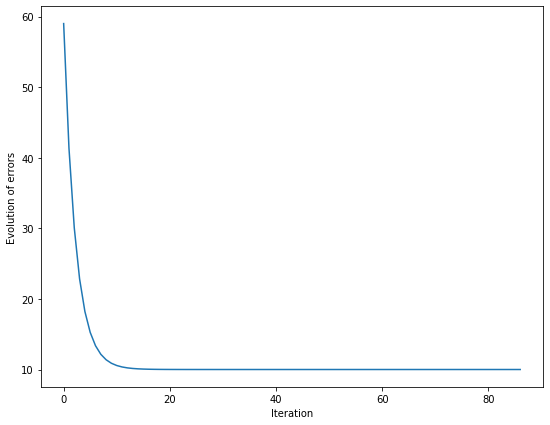

In [12]:
plt.figure(figsize=figsize)
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Evolution of errors')
plt.show()

In [13]:
errors

[59,
 41.36,
 30.070399999999996,
 22.845056,
 18.22083584,
 15.2613349376,
 13.367254360063999,
 12.155042790440959,
 11.379227385882213,
 10.882705526964617,
 10.564931537257355,
 10.361556183844707,
 10.231395957660613,
 10.148093412902792,
 10.094779784257787,
 10.060659061924984,
 10.03882179963199,
 10.024845951764473,
 10.015901409129263,
 10.010176901842728,
 10.006513217179346,
 10.004168458994782,
 10.002667813756661,
 10.001707400804262,
 10.001092736514728,
 10.000699351369425,
 10.000447584876433,
 10.000286454320916,
 10.000183330765386,
 10.000117331689848,
 10.000075092281502,
 10.00004805906016,
 10.000030757798504,
 10.000019684991042,
 10.000012598394267,
 10.00000806297233,
 10.000005160302292,
 10.000003302593466,
 10.000002113659818,
 10.000001352742284,
 10.000000865755062,
 10.00000055408324,
 10.000000354613274,
 10.000000226952494,
 10.000000145249597,
 10.000000092959741,
 10.000000059494235,
 10.00000003807631,
 10.00000002436884,
 10.000000015596056,
 10.00

In [14]:
print(f'Min value found through SGD: {errors[-1]}; operations done (f and gradient_f computations): {2 * len(errors)}')
print(f'Min value found through discretization: {min_f_discrete}; operations done: {len(x_draw)}')

Min value found through SGD: 10.000000000000002; operations done (f and gradient_f computations): 174
Min value found through discretization: 10.0001002003004; operations done: 1000


## Getting the case of a too large learning rate

If the learning rate $\alpha$ -- in code: lr -- is too large, the succesive values of $f$ are icnreasing or have a cycle of decrease--increase. The appropriate value of $\alpha$ depends on the error fucntion at hand. 

In [15]:
lr=1.1
x_current = 7
errors = [f(x_current)]

current_iter = 0
max_iters = 100 # to avoid invinite wandering on the error function; this might happen if either learning rate is too small, 
# or if it is too large and the error increases indefinitely  

while current_iter < max_iters:
    current_iter += 1
    grad_f_x = grad_f(x_current) # 
    x_current = x_current - lr * grad_f_x
    errors.append(f(x_current))
    # due to floating point errors, the gradient might not be a perfect 0, but close to 0
    if np.abs(grad_f_x) < 1e-7 or current_iter == max_iters:
        break
        
print(errors)

# note that the errors increase, instead of decreasing 

[59, 80.56000000000003, 111.60640000000011, 156.31321600000018, 220.69103104000033, 313.3950846976005, 446.88892196454503, 639.1200476289449, 915.9328685856808, 1314.5433307633814, 1888.542396299269, 2715.1010506709486, 3905.3455129661666, 5619.29753867128, 8087.388455686644, 11641.43937618877, 16759.27270171183, 24128.95269046504, 34741.29187426967, 50023.060298948345, 72028.80683048563, 103717.08183589936, 149348.19784369512, 215057.00489492097, 309677.68704868626, 445931.46935010824, 642136.915864156, 924672.7588443849, 1331524.372735915, 1917390.6967397179, 2761038.203305195, 3975890.6127594826, 5725278.0823736545, 8244396.038618065, 11871925.89561002, 17095568.889678434, 24617614.80113695, 35449360.91363722, 51047075.31563762, 73507784.05451816, 105851204.63850619, 152425730.27944902, 219493047.20240667, 316069983.57146573, 455140771.9429106, 655402707.1977916, 943779893.96482, 1359043042.909341, 1957021977.3894513, 2818111643.0408106, 4058080761.5787683, 5843636292.273427, 841483

## Code refactoring

In [16]:
# code factorization: the SGD algo in a separate function

def sgd(f, grad_f, lr, x, max_iters = 100):
    """Applies the SGD on the error function :param f: and returns the a list of succesive (and hopefully decreasing)
    values of the :param f:. 
    :param f: the function whose min value is sought
    :param grad_f: the gradient of the error function, provided as a function
    :param lr: the learning rate
    :param x: the point to start the search from
    :param max_iters: the maximum number of iterations for the SGD algorithm
    :return: a list of succesive values, as computed by the sgd algorithm"""
    assert lr > 0, 'The learning rate must be > 0'
    assert max_iters > 0, 'The maximum number of iterations must be a natural number > 0'
    current_iter = 0
    errors = [f(x)]
    while current_iter < max_iters:
        current_iter += 1
        grad_f_x = grad_f(x)
        x = x - lr * grad_f_x
        errors.append(f(x))
        # due to floating point errors, the gradient might not be a perfect 0, but close to 0
        if np.abs(grad_f_x) < 1e-7 or current_iter == max_iters:
            break
    return errors 

In [17]:
def plot_errors(errors):
    """Plot the list of values passed as argument
    :param errors: the values to be plotted
    :return: None
    """
    plt.figure(figsize=figsize)
    plt.plot(errors)
    plt.xlabel('Iteration')
    plt.ylabel('Evolution of errors')
    plt.show()

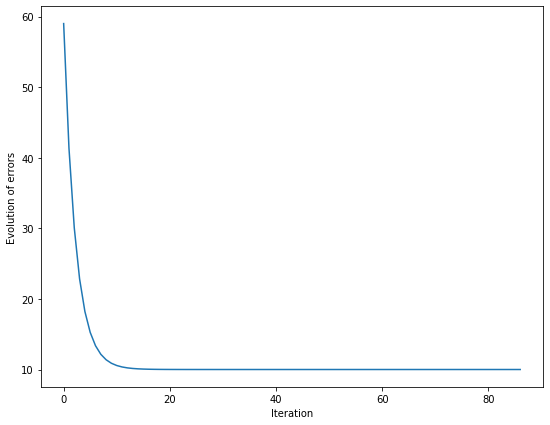

In [18]:
errors = sgd(f, grad_f, lr=0.1, x = 7, max_iters=90)
plot_errors(errors)

## Applying SGD on non-convex functions

If the error function is non-convex, the sgd might produce a decreasing set of values towards a local minimum. This is mainly influence by the starting point.

In [19]:
def non_convex(x):
    return np.sin(x**2)

Text(0, 0.5, '$sin(x^2)$')

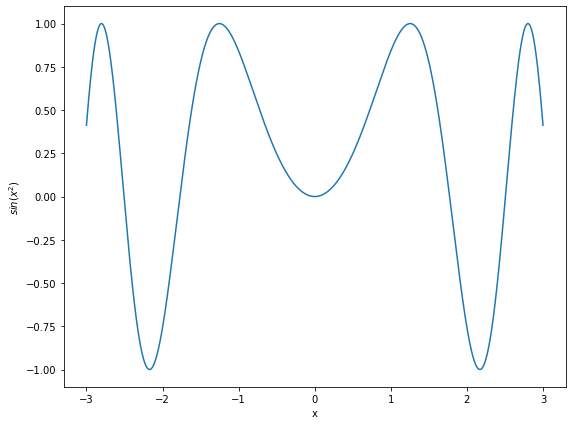

In [20]:
x_draw = np.linspace(-3, 3, 1000)
plt.figure(figsize=figsize)
plt.plot(x_draw, non_convex(x_draw))
plt.xlabel('x')
plt.ylabel('$sin(x^2)$')

In [21]:
def grad_non_convex(x):
    return 2 * x * np.cos(x**2)

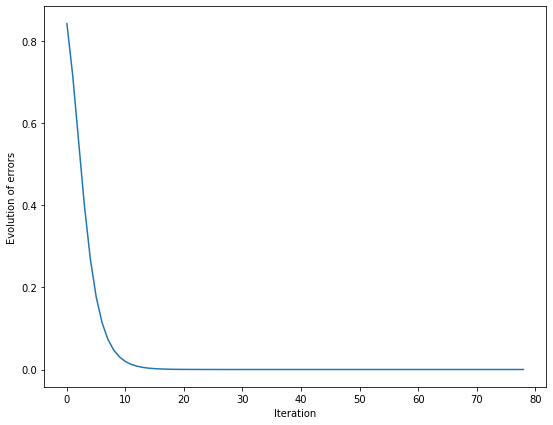

In [22]:
x_init = -1
errors = sgd(non_convex, grad_non_convex, lr=0.1, x = x_init, max_iters=100)
plot_errors(errors)

In [23]:
print(f'Error values found starting from {x_init}: {errors}')

Error values found starting from -1: [0.8414709848078965, 0.7142529515338631, 0.5550508277951516, 0.3976235664364111, 0.2692485923595407, 0.17677470799946562, 0.1143799493445494, 0.07353822644578398, 0.047153292089252515, 0.03020150078078261, 0.019335104762245203, 0.012376078989698789, 0.007921113249763823, 0.005069623301714842, 0.00324458796594756, 0.0020765439144045843, 0.0013289901017776004, 0.0008505541885254742, 0.0005443548178594854, 0.0003483871193970838, 0.00022296776584267275, 0.0001426993726109458, 9.132759911892965e-05, 5.8449663605964466e-05, 3.740778475234228e-05, 2.3940982253171034e-05, 1.5322228645089197e-05, 9.806226333659175e-06, 6.275984853752135e-06, 4.016630306456486e-06, 2.5706433961466005e-06, 1.6452117735376118e-06, 1.0529355350650644e-06, 6.738787424419014e-07, 4.3128239516288506e-07, 2.7602073290426433e-07, 1.7665326905873386e-07, 1.1305809219759089e-07, 7.235717900645849e-08, 4.630859456413351e-08, 2.9637500521045475e-08, 1.8968000333469107e-08, 1.213952021342

In [24]:
print(f'Min value found by sgd, starting from {x_init}: {errors[-1]}')

Min value found by sgd, starting from -1: 1.2784406934320567e-15


Starting from another point might lead to a better minimum.

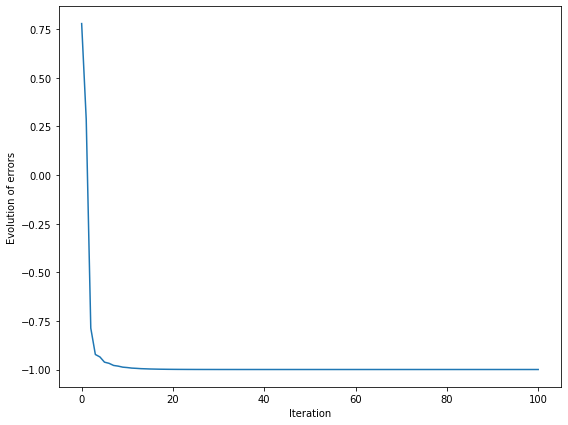

In [25]:
x_init = -1.5
errors = sgd(non_convex, grad_non_convex, lr=0.1, x = x_init, max_iters=100)
plot_errors(errors)

In [26]:
print(f'Error values found starting from {x_init}: {errors}')

Error values found starting from -1.5: [0.7780731968879212, 0.28664419814020803, -0.7873130846251607, -0.9227940320825496, -0.9354162310153192, -0.9622315531786622, -0.9682484202227373, -0.9791763430981587, -0.9826164655838177, -0.9879219930411206, -0.9900102921634714, -0.9928135045995253, -0.9941098084630321, -0.9956645373457744, -0.9964754301405062, -0.9973642766008589, -0.9978722464105346, -0.9983906606477359, -0.9987084589535944, -0.9990149733379563, -0.999213328573175, -0.9993962968752179, -0.9995197772072928, -0.9996297460863889, -0.9997064221661244, -0.9997728457969496, -0.9998203515020031, -0.9998606201264488, -0.9998899961855578, -0.9999144753941608, -0.9999326113323005, -0.999947522813097, -0.9999587045642003, -0.9999678020481388, -0.9999746887474326, -0.999980245724913, -0.9999844834733829, -0.9999878809187958, -0.9999904868170074, -0.9999925654213525, -0.9999941669675985, -0.9999954393783727, -0.9999964232331277, -0.9999972024635659, -0.9999978066511735, -0.9999982840119033

In [27]:
print(f'Min value found by sgd, starting from {x_init}: {errors[-1]}')

Min value found by sgd, starting from -1.5: -0.9999999999975107


**Conclusion**: depending on the starting point, we get different local minima. 

Related: [Gradient Descent Finds Global Minima of Deep Neural Networks](https://arxiv.org/abs/1811.03804v1).

# Using autograd

For complex error functions, computing the gradient by hand is still possible, but tedious. There are implementations which produce gradient of functions. Here we use the [autograd](https://github.com/HIPS/autograd) package. 

The [pip install](https://pypi.org/project/autograd/) command does not work at thetime of writing. We prefered to use [conda installation](https://anaconda.org/conda-forge/autograd):
```
conda install -c conda-forge autograd
```

In [28]:
!conda install autograd -c conda-forge

Solving environment: ...working... done

# All requested packages already installed.



In [29]:
import autograd.numpy as np
from autograd import grad

In [30]:
def f(x):
    return np.tanh(x**2) + x / (1.0 + np.log(x**4 + 1) ** 2)

In [31]:
grad_f = grad(f)

In [32]:
x_draw = np.linspace(-10, 10, 1000)
y_draw = f(x_draw)

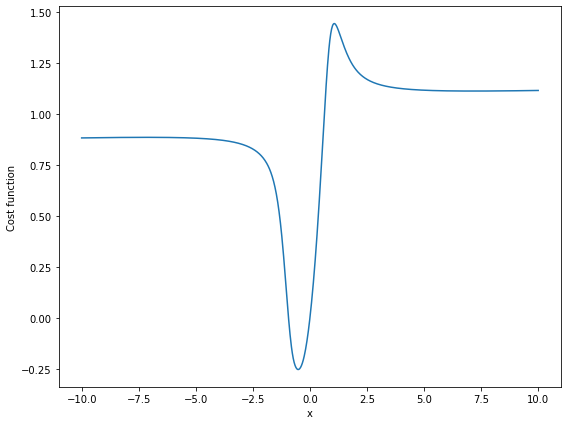

In [33]:
plt.figure(figsize=(9, 7))
plt.plot(x_draw, y_draw)
plt.xlabel('x')
plt.ylabel('Cost function')
plt.show()

In [34]:
x_init = -2.5 # make sure you specify floating point value for x_init, otherwise grad function crashes on int values
errors = sgd(f, grad_f, lr=0.1, x=x_init, max_iters=1000)

In [35]:
print(f'Min value found by sgd, starting from {x_init}: {errors[-1]}')

Min value found by sgd, starting from -2.5: -0.2534550163428922


# The problem of saddle points

If one starts the search from a saddle point, the algorithm stops prematurely:

In [36]:
def f(x):
    return x ** 3

In [37]:
grad_f = grad(f) # I'm lazy

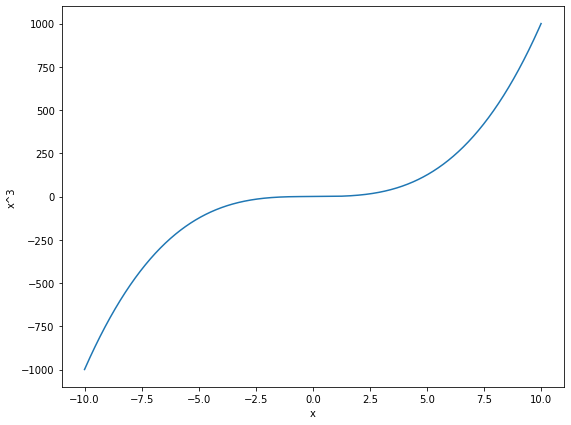

In [38]:
x_draw = np.linspace(-10, 10, 1000)
y_draw = f(x_draw)
plt.figure(figsize=(9, 7))
plt.plot(x_draw, y_draw)
plt.xlabel('x')
plt.ylabel('x^3')
plt.show()

In [39]:
x_init = 0.0
errors = sgd(f, grad_f, lr=0.1, x=x_init, max_iters=1000)

In [40]:
print(f'The errors list looks stationary, due to grad(f)(x_init)=0: {errors}')

The errors list looks stationary, due to grad(f)(x_init)=0: [0.0, 0.0]


For an extensive discussion, see [Identifying and attacking the saddle point problem in high-dimensional non-convex optimization](https://papers.nips.cc/paper/5486-identifying-and-attacking-the-saddle-point-problem-in-high-dimensional-non-convex-optimization)